### Importing the libraries required

In [2]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [5]:
data = pd.read_csv('AirPassengers.csv') #12 years data
data.head()

Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

In [6]:
data.tail()

Month  #Passengers
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

In [8]:
data.shape #144 months means this is the data for 12 years

(144, 2)

In [9]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

for any time series data, the time column should be your index always:

In [10]:
data = data.set_index("Month")

In [11]:
data.head()

#Passengers
Month               
1949-01          112
1949-02          118
1949-03          132
1949-04          129
1949-05          121

In [13]:
ts = data['#Passengers']
ts.head() #here index which is time column will automatically appear without prompt. that's the use of making time column as index 

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
Name: #Passengers, dtype: int64

### Let's check the stationarity of the data

Stationarity means the mean and variance of the data should not change wrt time. this is the kind of assumption for all time series analysis

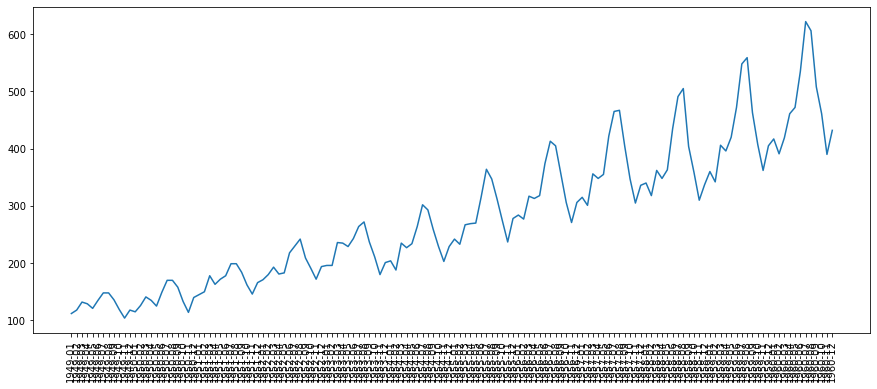

In [14]:
plt.plot(ts)
plt.xticks(rotation=90)
plt.show()

In [17]:
from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeseries): 
    #Determining rolling statistics 
    rolmean = timeseries.rolling(window = 12).mean() 
    rolstd = timeseries.rolling(window = 12).std() 
    #plotting rolling statistics 
    orig = plt.plot(timeseries, color = 'blue', label = 'Original') 
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean') 
    st = plt.plot(rolstd, color = 'black', label = 'Rolling Std') 
    plt.legend(loc = 'best') 
    plt.title('Rolling Mean & Standard Deviation') 
    plt.show() 
    #Dickey_Fuller test: 
    print('Results of Dickey-Fuller Test:') 
    dftest = adfuller(timeseries) 
    dfoutput = pd.Series(dftest[1:2], index = ['p-value']) 
    for key, value in dftest[4].items(): 
        dfoutput['Critical Value (%s)' %key] = value 
    print(dfoutput)

Moving average and rolling avg are one and same: 
Ex: for a 13th month avg(1 to 12), for 14th month avg(2 to 13)...

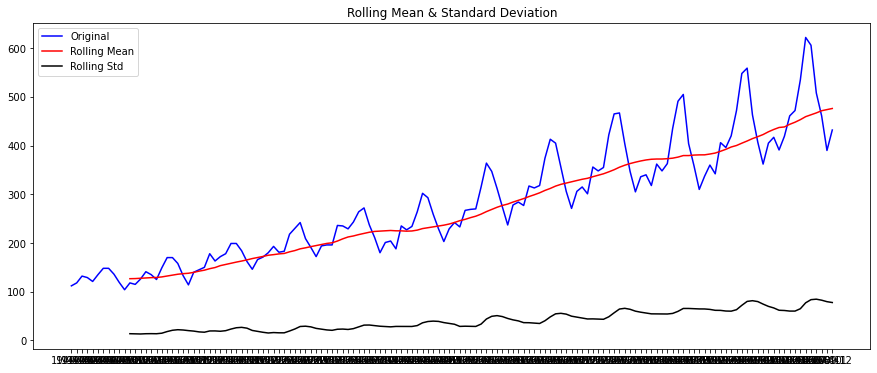

Results of Dickey-Fuller Test:
p-value                 0.991880
Critical Value (1%)    -3.481682
Critical Value (5%)    -2.884042
Critical Value (10%)   -2.578770
dtype: float64


In [18]:
test_stationarity(ts)

since it is evident from the above plot that my mean is changing with time and so my time series is not stationary

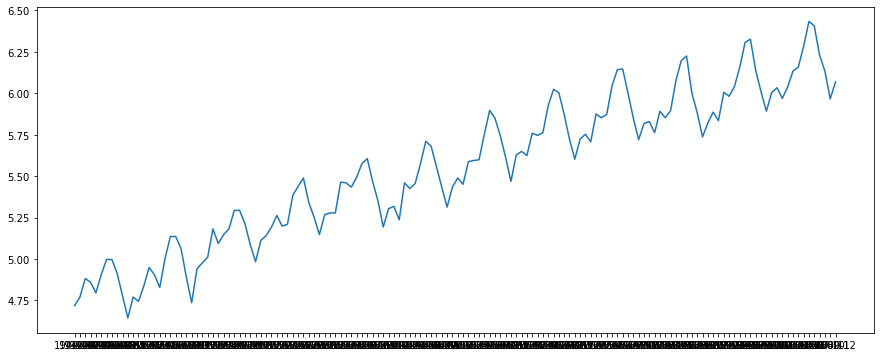

In [19]:
ts_log = np.log(ts)
plt.plot(ts_log)

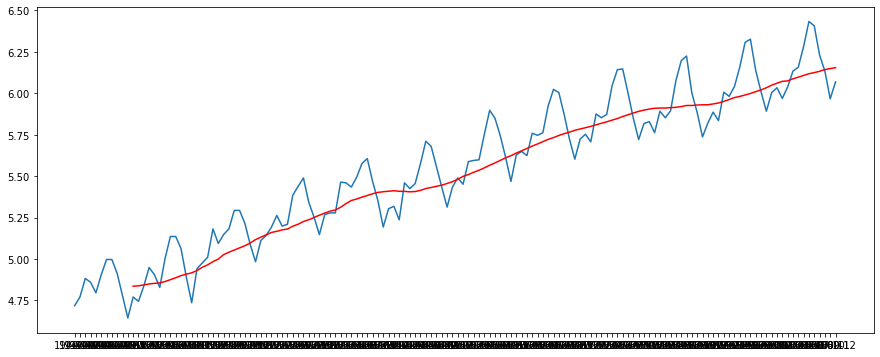

In [22]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

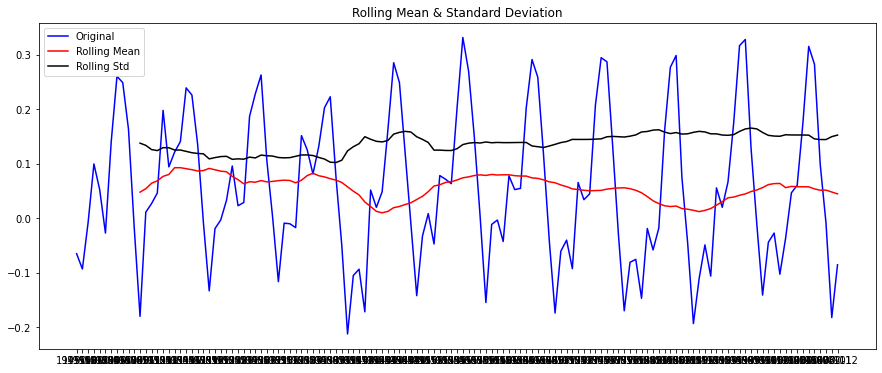

Results of Dickey-Fuller Test:
p-value                 0.022235
Critical Value (1%)    -3.486535
Critical Value (5%)    -2.886151
Critical Value (10%)   -2.579896
dtype: float64


In [23]:
ts_log_mvgavg_diff = ts_log-moving_avg
ts_log_mvgavg_diff.dropna(inplace=True)
test_stationarity(ts_log_mvgavg_diff)